## Import Modules

In [99]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [100]:
paths = []
labels = []
for dirname, _, filenames in os.walk('TESS Toronto emotional speech set data/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break

print('Dataset is Loaded')

Dataset is Loaded


In [101]:
len(paths)

2800

In [102]:
paths[:5]

['TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_date_disgust.wav',
 'TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_rag_disgust.wav',
 'TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_raise_disgust.wav',
 'TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_ditch_disgust.wav',
 'TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_door_disgust.wav']

In [103]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [104]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,TESS Toronto emotional speech set data/TESS To...,disgust
1,TESS Toronto emotional speech set data/TESS To...,disgust
2,TESS Toronto emotional speech set data/TESS To...,disgust
3,TESS Toronto emotional speech set data/TESS To...,disgust
4,TESS Toronto emotional speech set data/TESS To...,disgust


In [105]:
df['label'].value_counts()

disgust    400
ps         400
happy      400
sad        400
neutral    400
fear       400
angry      400
Name: label, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

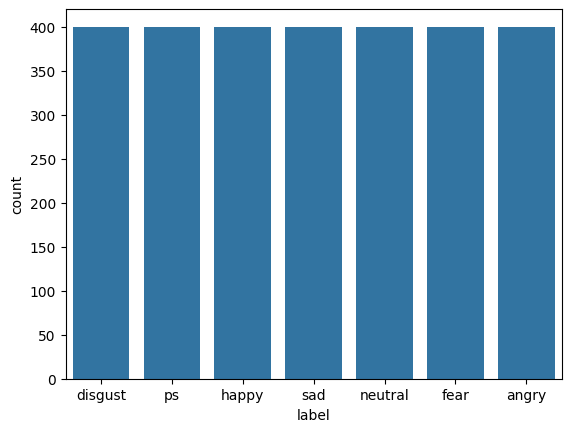

In [106]:
sns.countplot(data=df, x='label')

In [107]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

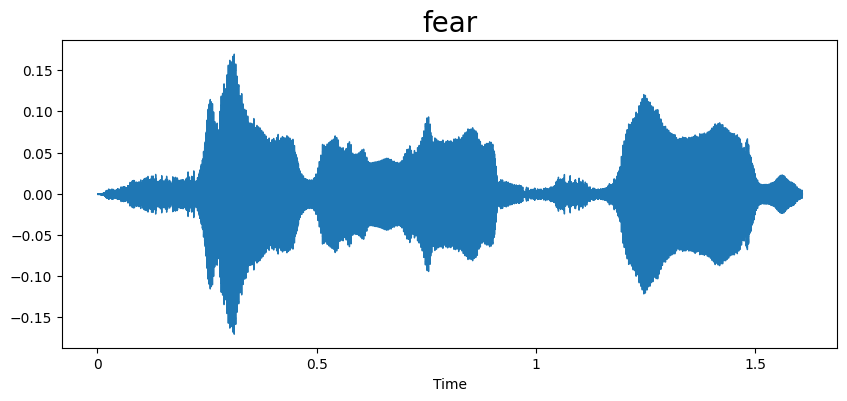

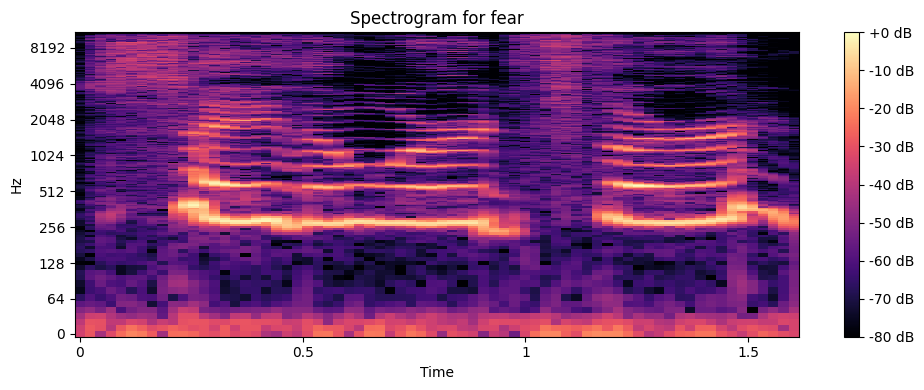

In [109]:
def spectrogram(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    
    # Compute the spectrogram
    D = np.abs(librosa.stft(data))**2
    S = librosa.power_to_db(D, ref=np.max)
    
    # Plot the spectrogram
    librosa.display.specshow(S, sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram for {emotion}")
    plt.tight_layout()
    plt.show()

# Usage
emotion = 'fear'
selected_rows = df['speech'][df['label'] == emotion]

if len(selected_rows) > 0:
    path = np.array(selected_rows)[0]
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)  # Now this will work
    Audio(path)
else:
    print(f"No speech data found for emotion: {emotion}")


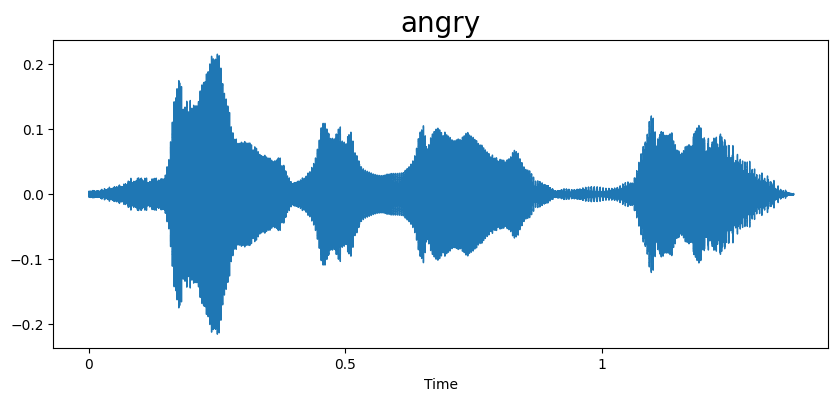

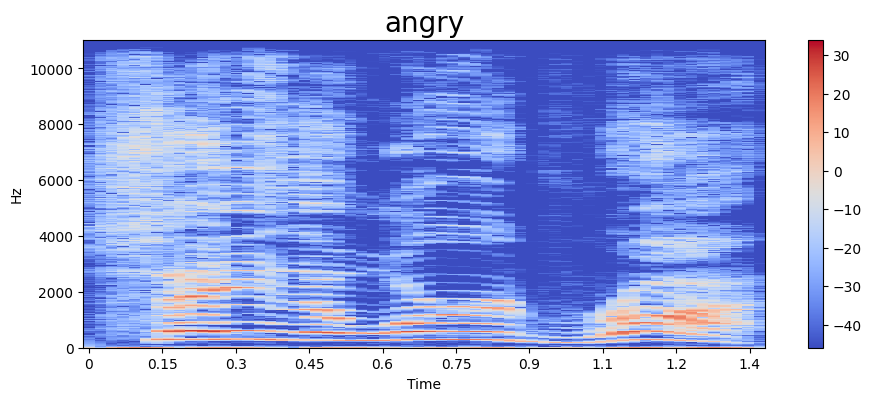

In [90]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

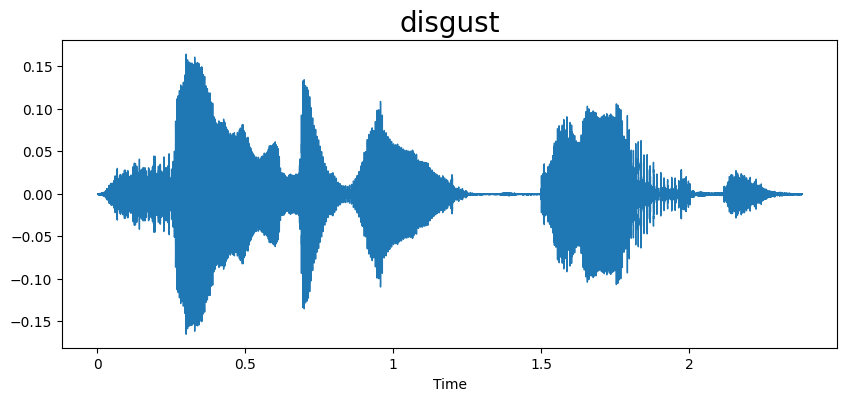

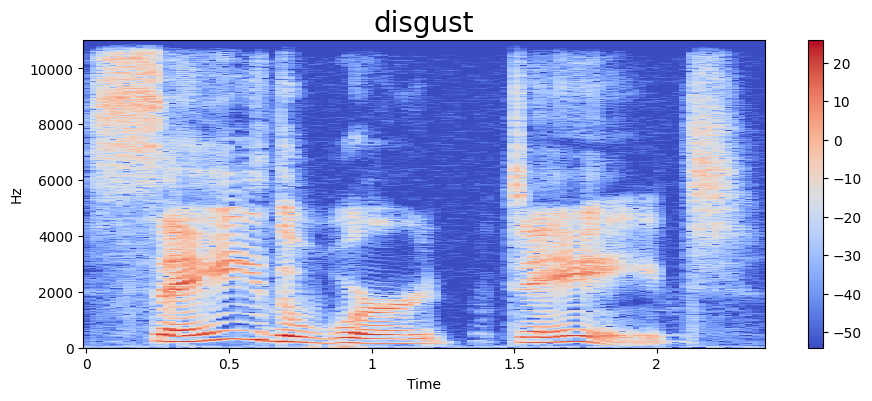

In [91]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

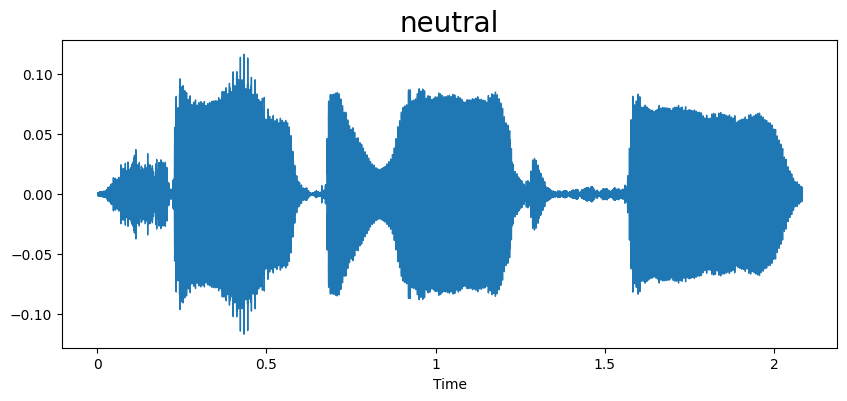

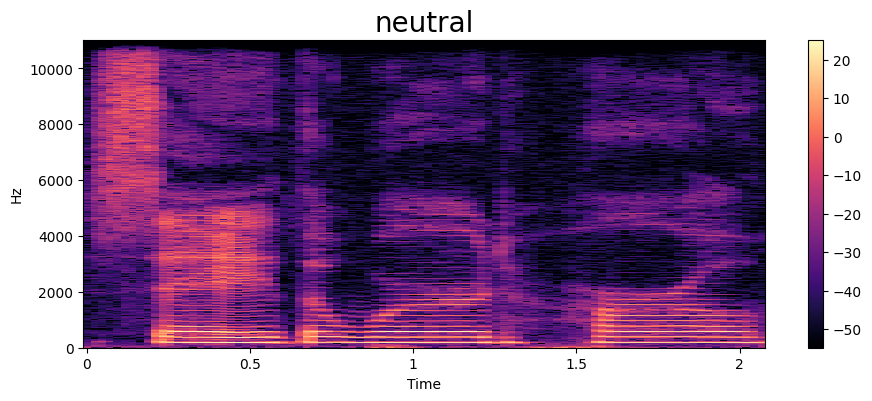

In [92]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

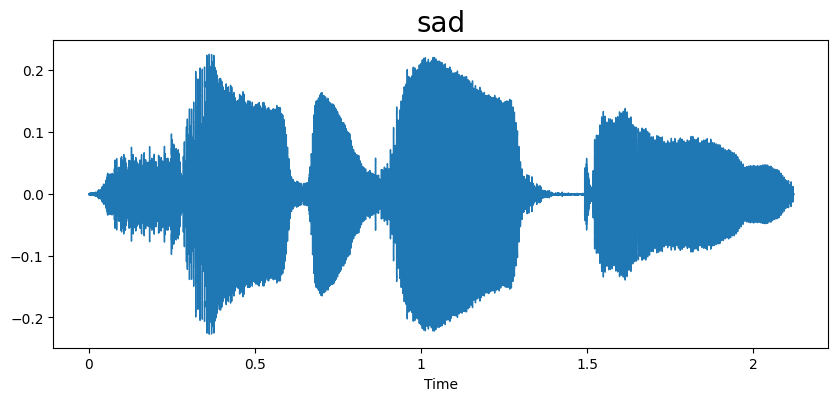

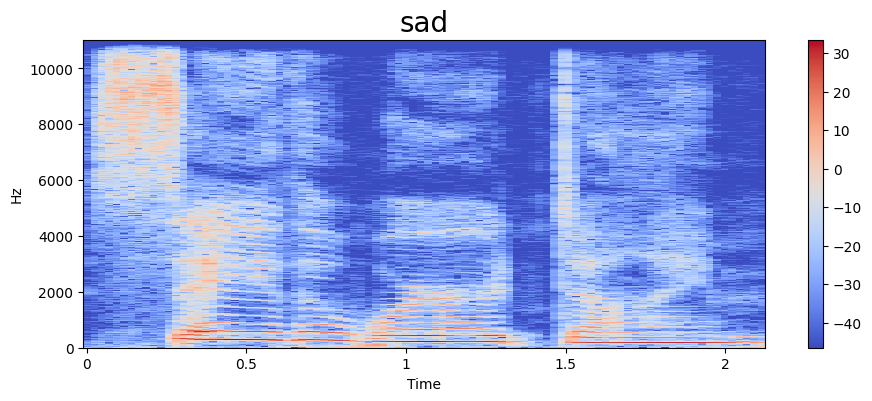

In [93]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

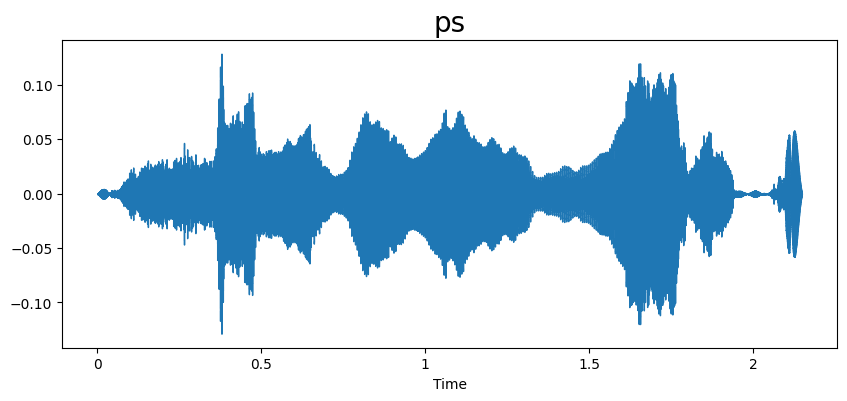

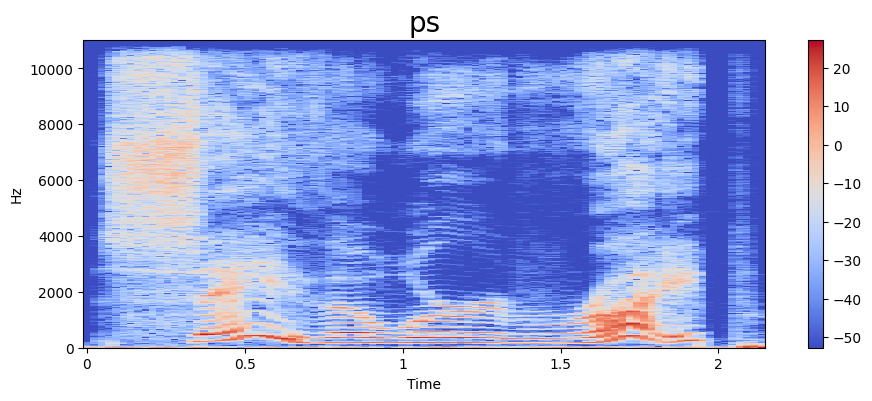

In [94]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

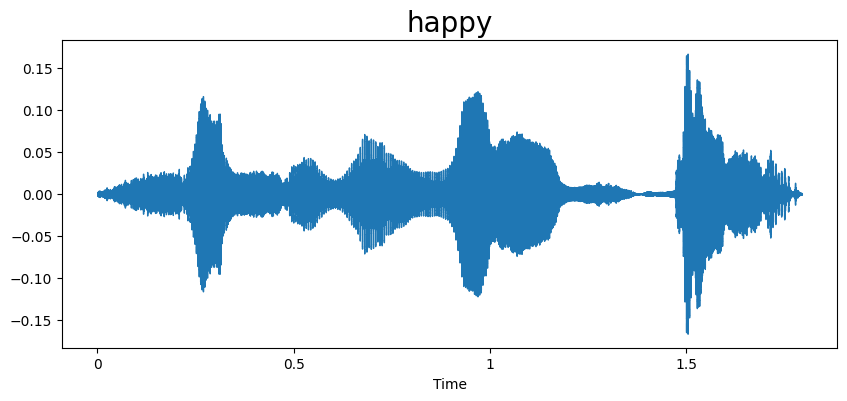

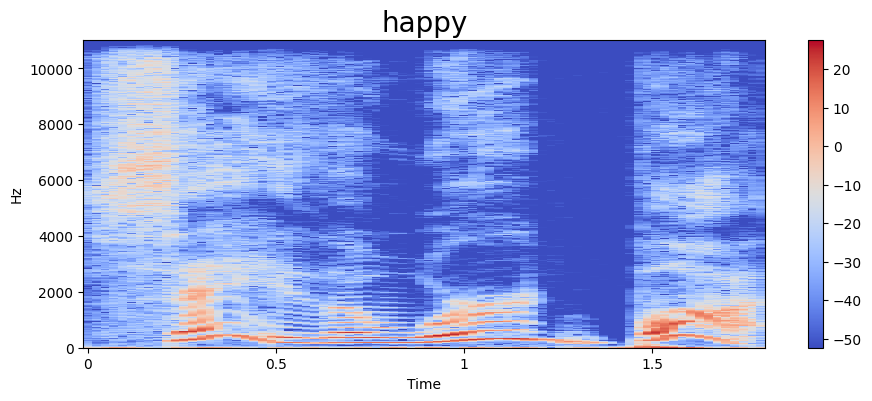

In [95]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [96]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [97]:
extract_mfcc(df['speech'][0])

array([-4.4636801e+02,  7.3789307e+01,  1.5521731e+00,  4.0626896e+01,
       -8.4494534e+00, -2.9341400e+00, -6.6822028e+00, -1.7199314e+01,
       -5.6114116e+00, -1.3409514e+01, -7.3893213e+00,  6.8370872e+00,
       -1.0458899e+01,  3.2033250e+00, -1.0037706e+00, -5.6148539e+00,
        4.2504120e+00, -1.1169558e+00, -9.1154442e+00,  2.1831052e+00,
       -7.7419276e+00,  6.4607936e-01, -3.6939945e+00,  3.7297410e-01,
       -2.0016880e+00, -1.8217647e+00, -2.7837260e+00,  2.8430920e+00,
       -3.0322778e+00,  4.5028725e+00, -8.8744110e-01,  4.2168212e+00,
        1.7408396e+00,  3.8251693e+00,  4.3130202e+00,  3.1095657e+00,
        3.5192695e+00,  4.1317453e+00,  2.2578511e+00,  2.3055398e+00],
      dtype=float32)

In [110]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [63]:
X_mfcc

0       [-446.368, 73.78931, 1.5521731, 40.626896, -8....
1       [-383.37564, 108.15568, -17.578175, 15.888096,...
2       [-404.0382, 87.21107, 0.48702064, 22.224413, -...
3       [-444.80597, 67.52622, -3.808902, 31.318571, -...
4       [-430.4275, 118.75985, 6.965282, 5.20493, -8.6...
                              ...                        
2795    [-574.78253, 95.66922, 34.85124, 16.82163, 17....
2796    [-557.92706, 89.87658, 33.661488, 15.339763, 2...
2797    [-527.0877, 115.28249, 26.172386, 7.6268435, 1...
2798    [-560.78094, 121.28373, 40.302494, -1.9568816,...
2799    [-552.6838, 106.72335, 35.172695, 8.060719, 22...
Name: speech, Length: 2800, dtype: object

In [64]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [65]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [66]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [59]:
y = y.toarray()

In [58]:
y.shape

(2800, 7)

## Create the LSTM Model

In [69]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Train the model
from tensorflow.keras import backend as K
from scipy.sparse import csr_matrix
from keras.utils import to_categorical

# Clear previous session
K.clear_session()

# Assuming X and y are already defined

# If 'y' is a sparse matrix, convert it to a dense array
if isinstance(y, csr_matrix):
    y = y.toarray()

# Convert labels to integers if needed (flatten in case it's multi-dimensional)
y = y.flatten()

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=7)

# Ensure data type compatibility
X = X.astype('float32')
y = y.astype('float32')

# Rebuild and compile the model if needed
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)




Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.7682 - loss: 0.8674 - val_accuracy: 0.8571 - val_loss: 0.4210
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.8565 - loss: 0.4434 - val_accuracy: 0.8571 - val_loss: 0.4162
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.8558 - loss: 0.4411 - val_accuracy: 0.8571 - val_loss: 0.4143
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.8501 - loss: 0.4418 - val_accuracy: 0.8571 - val_loss: 0.4143
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.8585 - loss: 0.4230 - val_accuracy: 0.8571 - val_loss: 0.4110
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.8516 - loss: 0.4357 - val_accuracy: 0.8571 - val_loss: 0.4105
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.8519 - loss: 0.4313 - val_accuracy: 0.8571 - val_loss: 0.4113
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.8707 - loss: 0.3920 - val_accuracy: 0

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

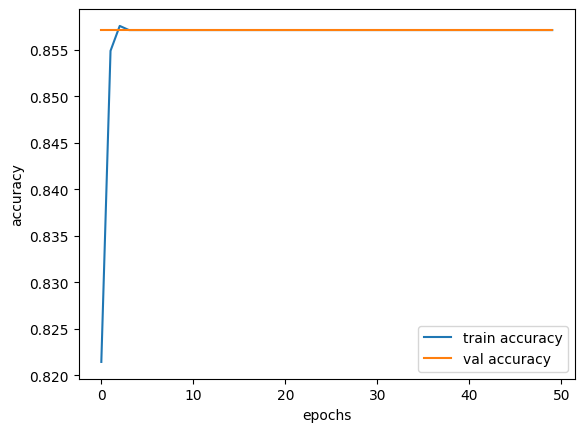

In [78]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

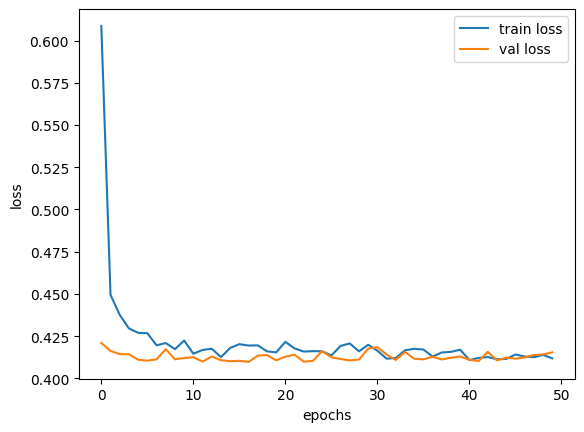

In [79]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()